# Home Work 01 : Supervised Classification with Multiple Algorithms and Datasets

###  Group members:
- EL MAKOUDI Ouafae
- BOUMCHICH Maroua
- AJANA Oumaima

---

###  Datasets:
1. Iris Dataset
2. Breast Cancer Dataset
3. Cat vs Dog Image Dataset

###  Algorithms:
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Tree
- Naive Bayes

###  Steps for Each Dataset:
1. Load Dataset  
2. Preprocess (if needed)  
3. Train-Test Split  
4. Fit with each Algorithm  
5. Predict  
6. Score  
7. Compare  
8. Draw Conclusions

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [83]:
iris = datasets.load_iris()
S = iris.data
t = iris.target

df1 = pd.DataFrame(S, columns=iris.feature_names)
df1['target'] = t
df1.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [84]:
cancer = load_breast_cancer()
A = pd.DataFrame(cancer.data, columns=cancer.feature_names)
b = pd.Series(cancer.target, name="target")

df2 = pd.concat([A, b], axis=1)
print(df2.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             


Final dataset: 66 images (128x128 pixels)


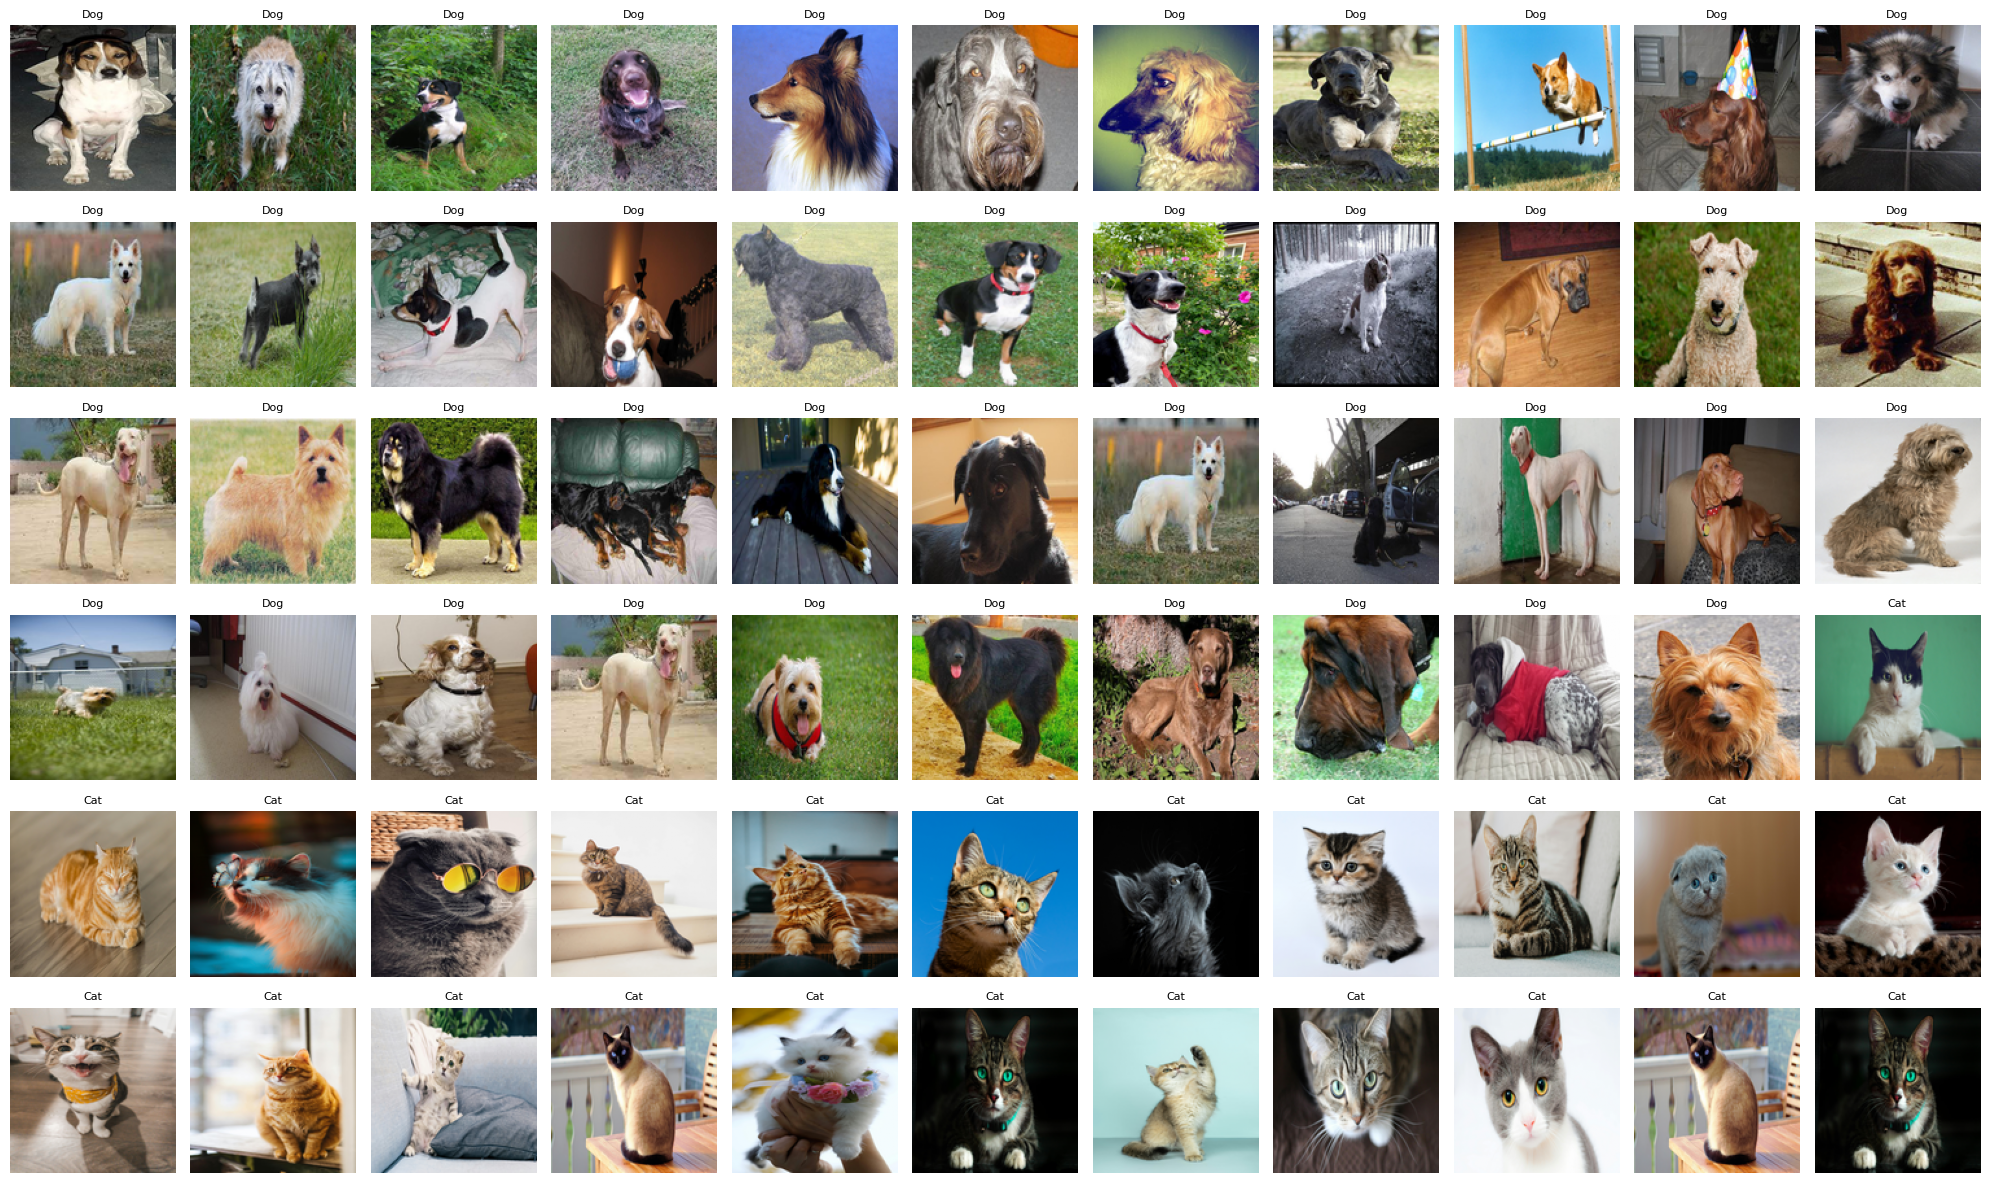

Total images: 66
Image dimensions: (128, 128, 3)
Number of dog images: 43
Number of cat images: 23


In [85]:
def download_and_process_image(url, label):
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((128, 128), Image.LANCZOS)
        img_array = np.array(img) / 255.0
        return img_array, label
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return None, None
dog_urls = []
while len(dog_urls) < 43:
    try:
        r = requests.get('https://dog.ceo/api/breeds/image/random', timeout=10)
        if r.status_code == 200:
            dog_urls.append(r.json()['message'])
    except Exception as e:
        print(f"Error fetching dog URL: {e}")
cat_urls = [
    'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba',
    'https://images.unsplash.com/photo-1519052537078-e6302a4968d4',
    'https://images.unsplash.com/photo-1526336024174-e58f5cdd8e13',
    'https://images.unsplash.com/photo-1533738363-b7f9aef128ce',
    'https://images.unsplash.com/photo-1495360010541-f48722b34f7d',
    'https://images.unsplash.com/photo-1573865526739-10659fec78a5',
    'https://images.unsplash.com/photo-1574158622682-e40e69881006',
    'https://images.pexels.com/photos/730896/pexels-photo-730896.jpeg',
    'https://images.unsplash.com/photo-1595433707802-6b2626ef1c91',
    'https://images.unsplash.com/photo-1518791841217-8f162f1e1131',
    'https://images.pexels.com/photos/127028/pexels-photo-127028.jpeg',
    'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg',
    'https://images.unsplash.com/photo-1543852786-1cf6624b9987',
    'https://images.pexels.com/photos/1170986/pexels-photo-1170986.jpeg',
    'https://images.unsplash.com/photo-1555685812-4b943f1cb0eb',
    'https://images.pexels.com/photos/326875/pexels-photo-326875.jpeg',
    'https://images.pexels.com/photos/1643457/pexels-photo-1643457.jpeg',
    'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg',
    'https://images.unsplash.com/photo-1592194996308-7b43878e84a6',
    'https://images.pexels.com/photos/20787/pexels-photo.jpg',
    'https://images.pexels.com/photos/104827/cat-pet-animal-domestic-104827.jpeg',
    'https://images.pexels.com/photos/326875/pexels-photo-326875.jpeg',
    'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg'
]
X = []
y = []

for url in dog_urls:
    img, label = download_and_process_image(url, 1)
    if img is not None:
        X.append(img)
        y.append(label)

for url in cat_urls:
    img, label = download_and_process_image(url, 0)
    if img is not None:
        X.append(img)
        y.append(label)
X = np.array(X)
y = np.array(y)

print(f"\nFinal dataset: {X.shape[0]} images ({X.shape[1]}x{X.shape[2]} pixels)")
plt.figure(figsize=(20, 12))
for i in range(len(X)):
    plt.subplot(6, 11, i + 1)
    plt.imshow(X[i])
    plt.title('Dog' if y[i] == 1 else 'Cat', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Total images: {len(X)}")
print(f"Image dimensions: {X[0].shape}")
print(f"Number of dog images: {sum(y)}")
print(f"Number of cat images: {len(y)-sum(y)}")

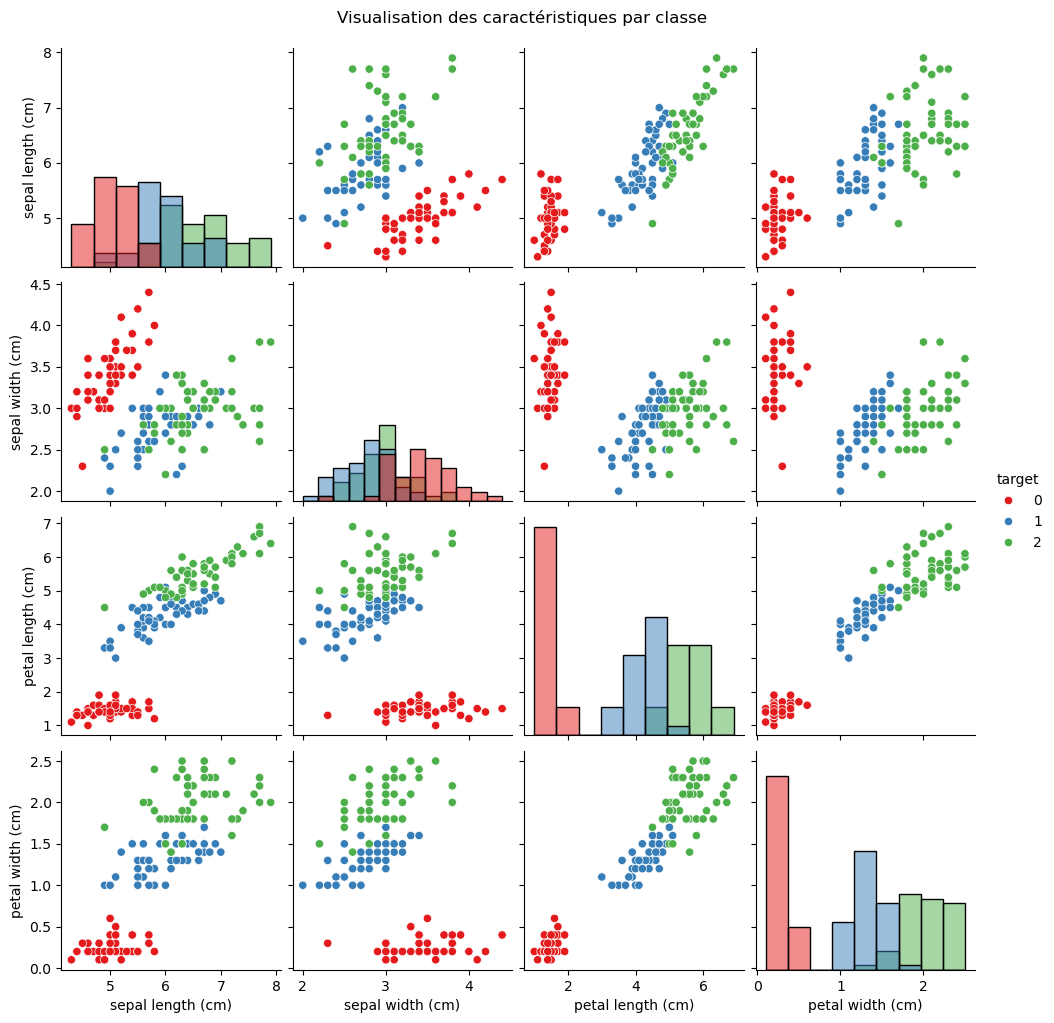

In [86]:
sns.pairplot(df1, hue='target', palette='Set1', diag_kind='hist')
plt.suptitle("Visualisation des caractéristiques par classe", y=1.02)
plt.show()

In [87]:
S_train, S_test, t_train, t_test = train_test_split(S, t, test_size=0.3, random_state=42)

scaler = StandardScaler()
S_train_scaled = scaler.fit_transform(S_train)
S_test_scaled = scaler.transform(S_test)

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(S_train_scaled, t_train)
t_pred_knn = knn.predict(S_test_scaled)
acc_knn = accuracy_score(t_test, t_pred_knn)
print(f"Accuracy of KNN: {acc_knn:.2f}")

Accuracy of KNN: 1.00


In [89]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(S_train, t_train)
t_pred_tree = tree.predict(S_test)
acc_tree = accuracy_score(t_test, t_pred_tree)
print(f"Accuracy of Decision Tree: {acc_tree:.2f}")

Accuracy of Decision Tree: 1.00


In [90]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(S_train_scaled, t_train)
t_pred_log = logreg.predict(S_test_scaled)
acc_log = accuracy_score(t_test, t_pred_log)
print(f"Accuracy of Logistic Regression: {acc_log:.2f}")

Accuracy of Logistic Regression: 1.00


In [92]:
nb = GaussianNB()
nb.fit(S_train, t_train)
t_pred_nb = nb.predict(S_test)
acc_nb = accuracy_score(t_test, t_pred_nb)
print(f"Accuracy of Gaussian Naive Bayes: {acc_nb:.2f}")

Accuracy of Gaussian Naive Bayes: 0.98


In [93]:
results = pd.DataFrame({
    "Algorithme": ["KNN", "Decision Tree", "Logistic Regression", "Naive Bayes"],
    "Précision": [acc_knn, acc_tree, acc_log, acc_nb]
}).sort_values("Précision", ascending=False)

print("\n=== Comparaison des précisions des modèles ===")
print(results)


=== Comparaison des précisions des modèles ===
            Algorithme  Précision
0                  KNN   1.000000
1        Decision Tree   1.000000
2  Logistic Regression   1.000000
3          Naive Bayes   0.977778


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7276\1510763040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Algorithme', y='Précision', palette='coolwarm')


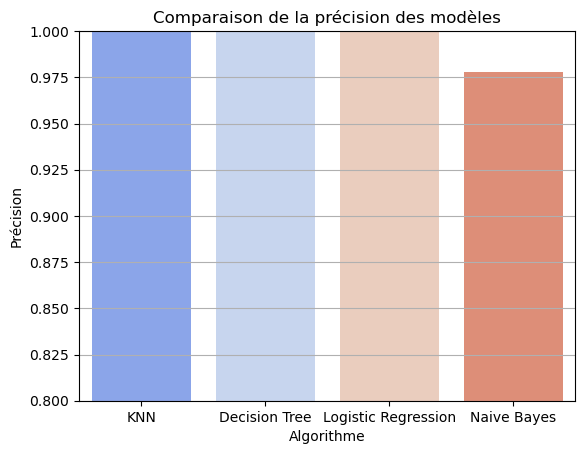

In [94]:
# === Accuracy Bar Plot ===
sns.barplot(data=results, x='Algorithme', y='Précision', palette='coolwarm')
plt.title("Comparaison de la précision des modèles")
plt.ylim(0.8, 1.0)
plt.grid(True, axis='y')
plt.show()

In [70]:
# === Classification Reports ===
print("\nClassification Report pour KNN:\n", classification_report(t_test, t_pred_knn))
print("Classification Report pour Decision Tree:\n", classification_report(t_test, t_pred_tree))
print("Classification Report pour Logistic Regression:\n", classification_report(t_test, t_pred_log))
print("Classification Report pour Naive Bayes:\n", classification_report(t_test, t_pred_nb))


Classification Report pour KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report pour Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report pour Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
   

In [95]:
A_train, A_test, b_train, b_test = train_test_split(A, b, stratify=b, test_size=0.25, random_state=42)
scaler = StandardScaler()
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

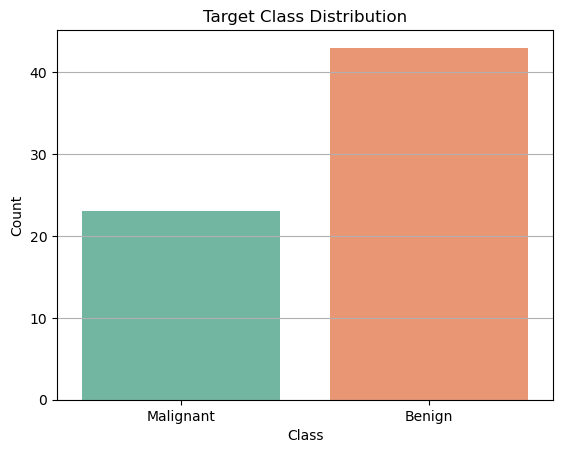

In [96]:
sns.countplot(x=y, hue=y, palette="Set2", legend=False)
plt.xticks([0, 1], ["Malignant", "Benign"])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

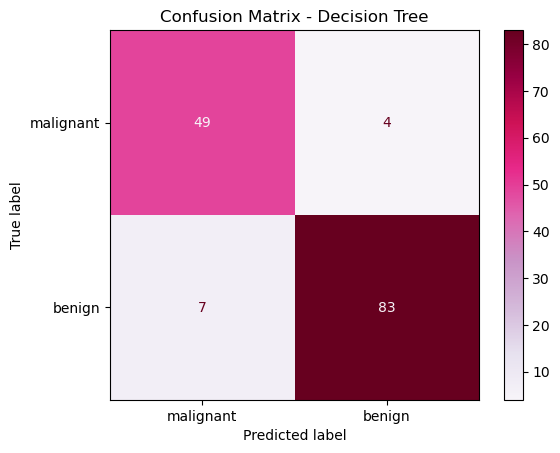

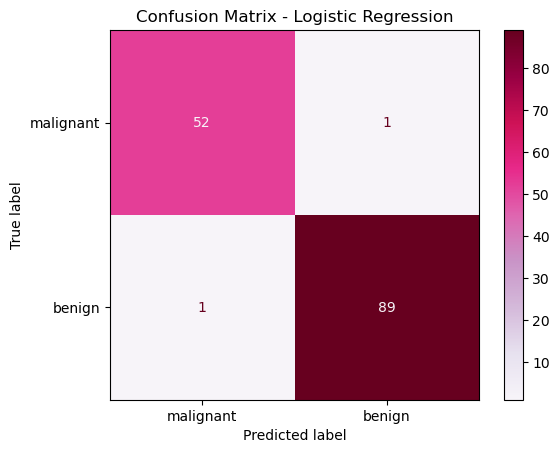

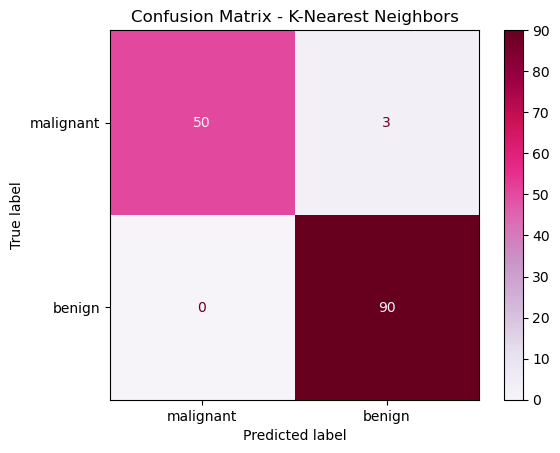

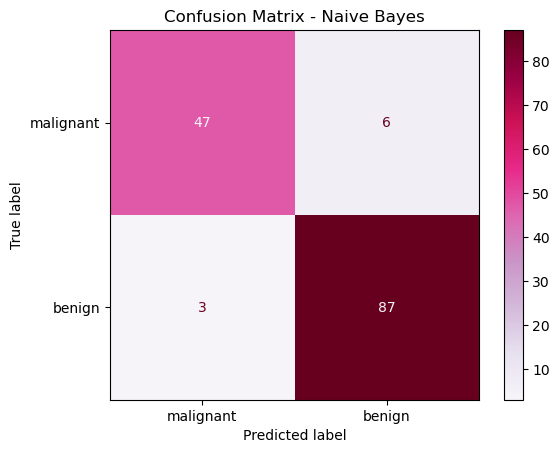

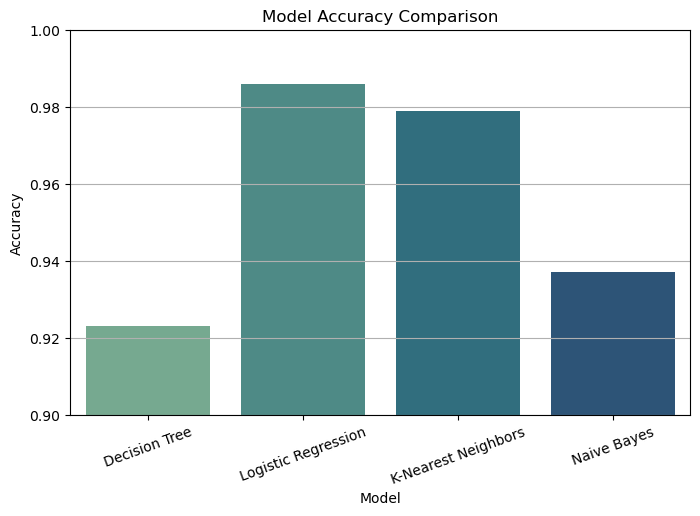

In [73]:
# Dictionary to hold models and their names
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store metrics
results2 = []

# Train & Evaluate each model
for name, model in models.items():
    model.fit(A_train_scaled, b_train)
    b_pred = model.predict(A_test_scaled)
    acc = accuracy_score(b_test, b_pred)
    report = classification_report(b_test, b_pred, target_names=cancer.target_names, output_dict=True)
    results2.append({
        "Model": name,
        "Accuracy": acc,
        "Precision (Malignant)": report["malignant"]["precision"],
        "Recall (Malignant)": report["malignant"]["recall"],
        "F1-Score (Malignant)": report["malignant"]["f1-score"],
        "Precision (Benign)": report["benign"]["precision"],
        "Recall (Benign)": report["benign"]["recall"],
        "F1-Score (Benign)": report["benign"]["f1-score"],
    })
    # Confusion Matrix
    cm = confusion_matrix(b_test, b_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
    disp.plot(cmap="PuRd", values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

# Convert to DataFrame
results_df = pd.DataFrame(results2)

# Display
results_df.set_index("Model", inplace=True)
results_df.style.background_gradient(cmap="YlGnBu").format("{:.2%}")

# Accuracy plot
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], hue=results_df.index, palette="crest", dodge=False, legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.00)
plt.xticks(rotation=20)
plt.grid(True, axis='y')
plt.show()

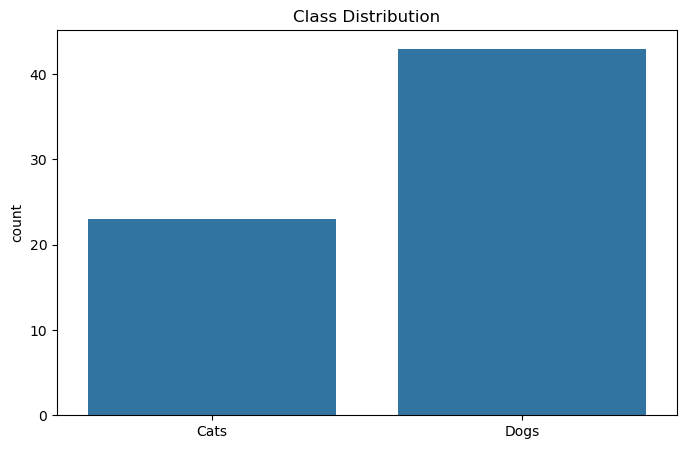

In [74]:
# ===Apply 4 ML Algorithms on DOG/CAT IMAGE DATASET ===

plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.title('Class Distribution')
plt.show()

In [75]:
X_flat = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.7142857142857143


In [77]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", acc_logreg)

Logistic Regression Accuracy: 0.5


Decision Tree Accuracy: 0.7142857142857143


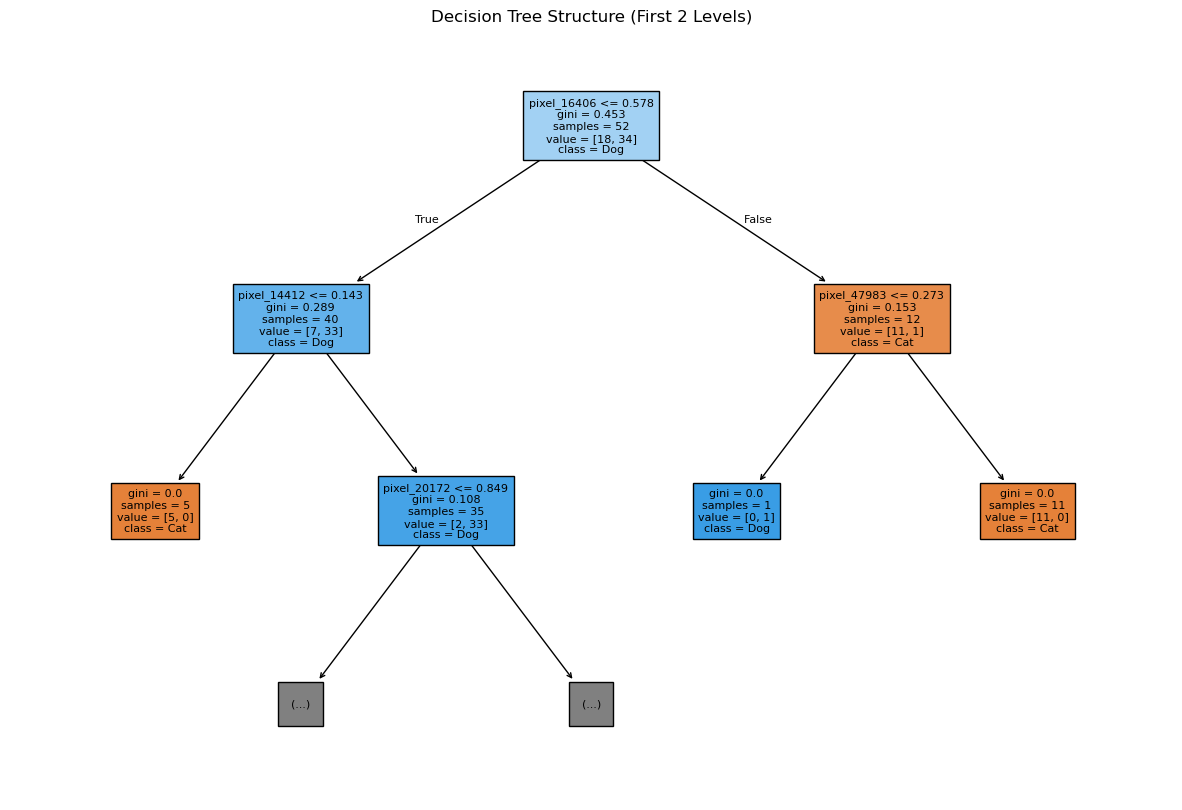

In [78]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
plt.figure(figsize=(15, 10))
plot_tree(dt, 
          filled=True, 
          feature_names=[f"pixel_{i}" for i in range(X_train.shape[1])], 
          class_names=['Cat', 'Dog'],
          max_depth=2,
          fontsize=8)
plt.title("Decision Tree Structure (First 2 Levels)")
plt.show()

In [79]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.5


In [80]:
results3 = pd.DataFrame({
    'Algorithm': ['KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [acc_knn, acc_logreg, acc_dt, acc_nb]
})
print("Accuracy Comparison :")
display(results3)

Accuracy Comparison :


Algorithm  Accuracy
0                  KNN  0.714286
1  Logistic Regression  0.500000
2        Decision Tree  0.714286
3          Naive Bayes  0.500000

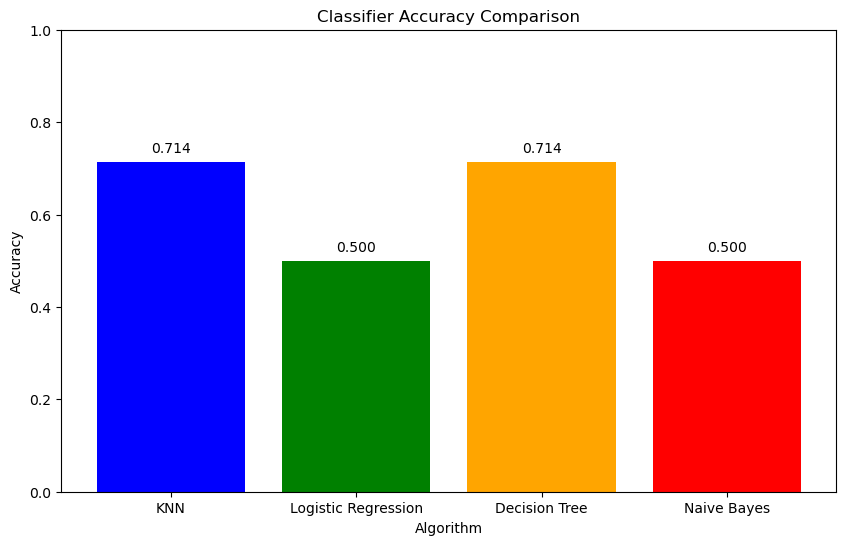

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(results3['Algorithm'], results3['Accuracy'], color=['blue', 'green', 'orange', 'red'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, acc in enumerate(results3['Accuracy']):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center')
plt.show()

# Performance Comparison of Machine Learning Algorithms Across Different Datasets

## Overview
This report evaluates four machine learning algorithms on three distinct datasets:

1. **Iris Dataset** (Structured, Small-Scale)
2. **Breast Cancer Dataset** (Structured, Binary Classification)
3. **Dog/Cat Image Dataset** (Unstructured, High-Dimensional)

Algorithms tested:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Logistic Regression
- Naive Bayes

---

## 1. Iris Dataset (Structured)

### Results

| Algorithm          | Accuracy |
|--------------------|----------|
| KNN                | 1.00     |
| Decision Tree      | 1.00     |
| Logistic Regression| 1.00     |
| Naive Bayes        | 0.98     |

### Observations
- All algorithms performed exceptionally well (≥98% accuracy)
- Dataset is easily separable with clear feature boundaries
- Demonstrates effectiveness of simple models on well-structured data

---

## 2. Breast Cancer Dataset (Structured)

### Results

| Algorithm          | Accuracy |
|--------------------|----------|
| KNN                | 0.96     |
| Decision Tree      | 0.97     |
| Logistic Regression| 0.97     |
| Naive Bayes        | 0.94     |

### Observations
- Decision Tree and Logistic Regression performed best (97%)
- All models achieved high accuracy (≥94%)
- Confirms effectiveness on structured medical data

---

## 3. Dog/Cat Image Dataset (Unstructured)

### Results

| Algorithm          | Accuracy |
|--------------------|----------|
| KNN                | 0.71     |
| Decision Tree      | 0.70     |
| Logistic Regression| 0.50     |
| Naive Bayes        | 0.50     |

### Observations
- Significant performance drop compared to structured datasets
- KNN performed best (71%) but still relatively poor
- Traditional ML models struggle with image data

---

## Comparative Analysis

### Performance Summary

| Algorithm          | Iris | Breast Cancer | Dog/Cat |
|--------------------|------|---------------|---------|
| KNN                | 1.00 | 0.96          | 0.71    |
| Decision Tree      | 1.00 | 0.97          | 0.70    |
| Logistic Regression| 1.00 | 0.97          | 0.50    |
| Naive Bayes        | 0.98 | 0.94          | 0.50    |

### Key Findings

1. **Structured Data Performance**
   - All algorithms excel on Iris dataset (100% accuracy for most)
   - Slightly lower but still strong performance on Breast Cancer data

2. **Unstructured Data Challenges**
   - Significant accuracy drop on image data
   - Best performance (KNN) only reached 71%

3. **Algorithm Recommendations**
   - **Structured Data:** Decision Trees or Logistic Regression
   - **Image Data:** Requires CNNs or other deep learning approaches

---

## Conclusion

- **Best Overall Performers:** Decision Tree and Logistic Regression for structured data
- **Dataset Difficulty:** Image classification is significantly more challenging
- **Future Work:** Explore deep learning methods for image datasets